In [111]:
# %load CosineCommented.py
__author__ = 'user'
# bits from http://stackoverflow.com/questions/15173225/how-to-calculate-cosine-similarity-given-2-sentence-strings-python
# load_docs, process_docs and compute_vector by MK
import math
from collections import Counter

vector_dict = {}                                       #Dict that will hold tf-idf matrix

#Just loads in all the documents
def load_docs():
 print("Loading docs...")
 doc1=('d1', "Yorkshire County Cricket Club is one of eighteen first-class county clubs within the domestic cricket structure of England and Wales. It represents the historic county of Yorkshire. It is a first-class team.")
 doc2=('d2', "Yorkshire County Cricket play in the County Championship since the official start of the competition in 1890 and have played in every top-level domestic cricket competition in England.")
 doc3=('d3', "Yorkshire County Cricket play most of their home games at the Headingley Cricket Ground in Leeds. Another significant venue is at North Marine Road Ground, Scarborough, which houses the annual Scarborough Festival.")
 return [doc1, doc2,doc3]

In [112]:
#Computes TF for words in each doc, DF for all features in all docs; finally whole Tf-IDF matrix
def process_docs(all_dcs):
 stop_words = [ 'of', 'and', 'on','in' ]
 all_words = []                                         #list to collect all unique words in each docs
 counts_dict = {}                                       #dict to collect doc data, word-counts and word-lists
 for doc in all_dcs:
    words = [x.lower() for x in doc[1].split() if x not in stop_words]
    words_counted = Counter(words)                      #counts words in a doc
    unique_words = list(words_counted.keys())           #list of the unique words in the doc
    counts_dict[doc[0]] = words_counted                 #make dict entry {'d1' : {'a': 1, 'b':6}}
    all_words = all_words + unique_words                #collect all unique words from each doc; bit hacky
 n = len(counts_dict)                                   #number of documents is no of entries in dict
 df_counts = Counter(all_words)                         #DF of all unique words from each doc, counted
 compute_vector_len(counts_dict, n, df_counts)          #computes TF-IDF for all words in all docs


#computes TF-IDF for all words in all docs
def compute_vector_len(doc_dict, no, df_counts):
  global vector_dict
  for doc_name in doc_dict:                              #for each doc
    doc_words = doc_dict[doc_name].keys()                #get all the unique words in the doc
    wd_tfidf_scores = {}
    for wd in list(set(doc_words)):                      #for each word in the doc
        wds_cts = doc_dict[doc_name]                     #get the word-counts-dict for the doc
        wd_tf_idf = wds_cts[wd] * math.log(no / df_counts[wd], 10)   #compute TF-IDF
        wd_tfidf_scores[wd] = round(wd_tf_idf, 4)        #store Tf-IDf scores with word
    vector_dict[doc_name] = wd_tfidf_scores              #store all Tf-IDf scores for words with doc_name


def get_cosine(text1, text2):
     vec1 = vector_dict[text1]
     vec2 = vector_dict[text2]
     intersection = set(vec1.keys()) & set(vec2.keys())
     #NB strictly, this is not really correct, needs vector of all features with zeros
     numerator = sum([vec1[x] * vec2[x] for x in intersection])
     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)
     if not denominator:
        return 0.0
     else:
        return round(float(numerator) / denominator, 3)



#RUN THE DEFINED FNS

all_docs = load_docs()
process_docs(all_docs)

for keys,values in vector_dict.items(): print(keys, values)

text1 = 'd1'
text2 = 'd2'
cosine = get_cosine(text1, text2)
print('Cosine d1 & d2:', cosine)

text1 = 'd1'
text2 = 'd3'
cosine = get_cosine(text1, text2)
print('Cosine d1 & d3:', cosine)

text1 = 'd2'
text2 = 'd3'
cosine = get_cosine(text1, text2)
print('Cosine d2 & d3:', cosine)

Loading docs...
d1 {'cricket': 0.0, 'england': 0.4771, 'is': 0.3522, 'wales.': 0.4771, 'yorkshire': 0.0, 'yorkshire.': 0.4771, 'one': 0.4771, 'first-class': 0.9542, 'eighteen': 0.4771, 'clubs': 0.4771, 'structure': 0.4771, 'domestic': 0.1761, 'team.': 0.4771, 'historic': 0.4771, 'represents': 0.4771, 'club': 0.4771, 'the': 0.0, 'within': 0.4771, 'it': 0.9542, 'a': 0.4771, 'county': 0.0}
d2 {'yorkshire': 0.0, 'the': 0.0, 'have': 0.4771, 'cricket': 0.0, 'every': 0.4771, 'england.': 0.4771, 'played': 0.4771, 'competition': 0.9542, 'top-level': 0.4771, 'domestic': 0.1761, '1890': 0.4771, 'official': 0.4771, 'championship': 0.4771, 'since': 0.4771, 'play': 0.1761, 'start': 0.4771, 'county': 0.0}
d3 {'cricket': 0.0, 'festival.': 0.4771, 'venue': 0.4771, 'is': 0.1761, 'scarborough,': 0.4771, 'another': 0.4771, 'yorkshire': 0.0, 'most': 0.4771, 'houses': 0.4771, 'headingley': 0.4771, 'significant': 0.4771, 'north': 0.4771, 'annual': 0.4771, 'leeds.': 0.4771, 'home': 0.4771, 'which': 0.4771, 'g

In [115]:
def load_docs_again():
 print("Loading docs...")
 doc1=('d1', "Yorkshire County Cricket Club is one of eighteen first-class county clubs within the domestic cricket structure of England and Wales. It represents the historic county of Yorkshire. It is a first-class team.")
 doc2=('d2', "Yorkshire County Cricket play in the County Championship since the official start of the competition in 1890 and have played in every top-level domestic cricket competition in England.")
 doc3=('d3', "Yorkshire County Cricket play most of their home games at the Headingley Cricket Ground in Leeds. Another significant venue is at North Marine Road Ground, Scarborough, which houses the annual Scarborough Festival.")
 doc4=('d4',"Yorkshire County Cricket Team is one of eighteen first-class clubs within the domestic cricket structure of England and Wales. It represents the historic state of Yorkshire. It is a first-class team.")
 doc5=('d5',"Yorkshire County Cricket Club is one of eighteen first-class clubs within the cricket structure of England. It constitutes the historic county of Yorkshire. It is a first-class team.")
 doc6=('d6',"Yorkshire Cricket Club is one of eighteen first-class clubs within the domestic cricket structure of England and Wales. It represents the historic state of Yorkshire. It is a first-class club.")
 doc7=('d7',"Yorkshire County is one of 18 first-class teams within the domestic cricket composition of England and Wales. It represents the county of Yorkshire. It is a first-class county.")
 doc8=('d8',"Yorkshire County Cricket Club is a first-class club within domestic cricket of England and Wales. It is based out of the historic county of Yorkshire. It is a first-class club.")

 return [doc1, doc2,doc3, doc4, doc5, doc6, doc7, doc8]

In [116]:
all_docs = load_docs_again()
process_docs(all_docs)
# vector_dict['q'] = {'cricket' : 1, 'county' : 1, 'yorkshire' : 1}

for keys,values in vector_dict.items(): print(keys, values)

text1 = 'd1'
text2 = 'd2'
cosine = get_cosine(text1, text2)
print('Cosine d1 & d2:', cosine)

text1 = 'd1'
text2 = 'd3'
cosine = get_cosine(text1, text2)
print('Cosine d1 & d3:', cosine)

text1 = 'd2'
text2 = 'd3'
cosine = get_cosine(text1, text2)
print('Cosine d2 & d3:', cosine)



Loading docs...
d1 {'cricket': 0.0, 'england': 0.2041, 'is': 0.116, 'wales.': 0.2041, 'yorkshire': 0.0, 'yorkshire.': 0.1249, 'one': 0.2041, 'first-class': 0.2499, 'eighteen': 0.301, 'clubs': 0.301, 'structure': 0.301, 'domestic': 0.1249, 'team.': 0.426, 'historic': 0.2041, 'represents': 0.301, 'club': 0.301, 'the': 0.0, 'within': 0.1249, 'it': 0.2499, 'a': 0.1249, 'county': 0.174}
d2 {'yorkshire': 0.0, 'the': 0.0, 'have': 0.9031, 'cricket': 0.0, 'every': 0.9031, 'england.': 0.6021, 'played': 0.9031, 'competition': 1.8062, 'top-level': 0.9031, 'domestic': 0.1249, '1890': 0.9031, 'official': 0.9031, 'championship': 0.9031, 'since': 0.9031, 'play': 0.6021, 'start': 0.9031, 'county': 0.116}
d3 {'cricket': 0.0, 'festival.': 0.9031, 'venue': 0.9031, 'is': 0.058, 'scarborough,': 0.9031, 'another': 0.9031, 'yorkshire': 0.0, 'most': 0.9031, 'houses': 0.9031, 'headingley': 0.9031, 'significant': 0.9031, 'north': 0.9031, 'annual': 0.9031, 'leeds.': 0.9031, 'home': 0.9031, 'which': 0.9031, 'groun

In [43]:
all_docs

[('d1',
  'Yorkshire County Cricket Club is one of eighteen first-class county clubs within the domestic cricket structure of England and Wales. It represents the historic county of Yorkshire. It is a first-class team.'),
 ('d2',
  'Yorkshire County Cricket play in the County Championship since the official start of the competition in 1890 and have played in every top-level domestic cricket competition in England.'),
 ('d3',
  'Yorkshire County Cricket play most of their home games at the Headingley Cricket Ground in Leeds. Another significant venue is at North Marine Road Ground, Scarborough, which houses the annual Scarborough Festival.'),
 ('d4',
  'Yorkshire County Cricket Team is one of eighteen first-class clubs within the domestic cricket structure of England and Wales. It represents the historic state of Yorkshire. It is a first-class team.'),
 ('d5',
  'Yorkshire County Cricket Club is one of eighteen first-class clubs within the cricket structure of England. It constitutes th

In [44]:
import itertools as it

In [45]:
a = list(it.combinations(vector_dict, 2))
a

[('d1', 'd2'),
 ('d1', 'd3'),
 ('d1', 'd4'),
 ('d1', 'd5'),
 ('d1', 'd6'),
 ('d1', 'd7'),
 ('d1', 'd8'),
 ('d2', 'd3'),
 ('d2', 'd4'),
 ('d2', 'd5'),
 ('d2', 'd6'),
 ('d2', 'd7'),
 ('d2', 'd8'),
 ('d3', 'd4'),
 ('d3', 'd5'),
 ('d3', 'd6'),
 ('d3', 'd7'),
 ('d3', 'd8'),
 ('d4', 'd5'),
 ('d4', 'd6'),
 ('d4', 'd7'),
 ('d4', 'd8'),
 ('d5', 'd6'),
 ('d5', 'd7'),
 ('d5', 'd8'),
 ('d6', 'd7'),
 ('d6', 'd8'),
 ('d7', 'd8')]

In [122]:
print("Cosine Similarity between:")
for pairs in a:
    print(pairs[0] + " and " + pairs[1] + " - " + str(get_cosine(pairs[0],pairs[1])))

Cosine Similarity between:
d1 and d2 - 0.01
d1 and d3 - 0.004
d1 and d4 - 0.627
d1 and d5 - 0.579
d1 and d6 - 0.65
d1 and d7 - 0.224
d1 and d8 - 0.326
d2 and d3 - 0.025
d2 and d4 - 0.005
d2 and d5 - 0.079
d2 and d6 - 0.004
d2 and d7 - 0.004
d2 and d8 - 0.005
d3 and d4 - 0.002
d3 and d5 - 0.002
d3 and d6 - 0.001
d3 and d7 - 0.002
d3 and d8 - 0.002
d4 and d5 - 0.356
d4 and d6 - 0.607
d4 and d7 - 0.152
d4 and d8 - 0.148
d5 and d6 - 0.358
d5 and d7 - 0.088
d5 and d8 - 0.189
d6 and d7 - 0.174
d6 and d8 - 0.432
d7 and d8 - 0.1


In [71]:
cosine_dict = {}
for text in range(len(all_docs)):
    cosine_dict[all_docs[text][0]] = get_cosine('d1', all_docs[text][0])
cosine_dict

{'d1': 1.0,
 'd2': 0.01,
 'd3': 0.004,
 'd4': 0.627,
 'd5': 0.579,
 'd6': 0.65,
 'd7': 0.224,
 'd8': 0.326}

In [10]:
import matplotlib.pyplot as plt

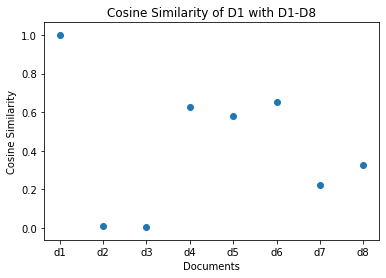

In [11]:
lists = sorted(cosine_dict.items())

x, y = zip(*lists)

plt.scatter(x, y)
plt.xlabel("Documents")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity of D1 with D1-D8")
plt.show()

In [66]:
doc_array = []
for key, val in vector_dict.items():
    temp = []
    for k, v in val.items():
        temp.append(k)
    temp = " ".join(temp)
    doc_array.append(temp)
doc_array

['cricket england is wales. yorkshire yorkshire. one first-class eighteen clubs structure domestic team. historic represents club the within it a county',
 'yorkshire the have cricket every england. played competition top-level domestic 1890 official championship since play start county',
 'cricket festival. venue is scarborough, another yorkshire most houses headingley significant north annual leeds. home which ground, games play ground the road scarborough marine their at county',
 'cricket team england is wales. yorkshire yorkshire. one state first-class eighteen clubs structure domestic team. historic represents the within it a county',
 'cricket england. is yorkshire yorkshire. one constitutes first-class eighteen clubs structure team. historic club the within it a county',
 'cricket england is wales. club. yorkshire yorkshire. one state first-class eighteen clubs structure domestic historic represents club the within it a',
 'cricket england is wales. 18 yorkshire yorkshire. one 

In [130]:
vector_dict

{'d1': {'cricket': 0.0,
  'england': 0.2041,
  'is': 0.116,
  'wales.': 0.2041,
  'yorkshire': 0.0,
  'yorkshire.': 0.1249,
  'one': 0.2041,
  'first-class': 0.2499,
  'eighteen': 0.301,
  'clubs': 0.301,
  'structure': 0.301,
  'domestic': 0.1249,
  'team.': 0.426,
  'historic': 0.2041,
  'represents': 0.301,
  'club': 0.301,
  'the': 0.0,
  'within': 0.1249,
  'it': 0.2499,
  'a': 0.1249,
  'county': 0.174},
 'd2': {'yorkshire': 0.0,
  'the': 0.0,
  'have': 0.9031,
  'cricket': 0.0,
  'every': 0.9031,
  'england.': 0.6021,
  'played': 0.9031,
  'competition': 1.8062,
  'top-level': 0.9031,
  'domestic': 0.1249,
  '1890': 0.9031,
  'official': 0.9031,
  'championship': 0.9031,
  'since': 0.9031,
  'play': 0.6021,
  'start': 0.9031,
  'county': 0.116},
 'd3': {'cricket': 0.0,
  'festival.': 0.9031,
  'venue': 0.9031,
  'is': 0.058,
  'scarborough,': 0.9031,
  'another': 0.9031,
  'yorkshire': 0.0,
  'most': 0.9031,
  'houses': 0.9031,
  'headingley': 0.9031,
  'significant': 0.9031,
  

In [131]:
tfaaa = pd.DataFrame(tfidf.todense(), columns=vec.get_feature_names())
tfaaa["cricket"]

0    0.159337
1    0.111495
2    0.077460
3    0.139878
4    0.158918
5    0.146135
6    0.146476
7    0.150494
Name: cricket, dtype: float64

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
vec = TfidfVectorizer()
tfidf = vec.fit_transform(doc_array)
distances = euclidean_distances(tfidf)
distances[0]

array([0.        , 1.30899098, 1.35631011, 0.45874825, 0.55881444,
       0.50913779, 0.90504823, 0.85190025])

In [92]:
import pandas as pd
doc_term_matrix = tfidf.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=vec.get_feature_names())
df

,18,1890,annual,another,at,based,championship,class,club,clubs,...,team,teams,the,their,top,venue,wales,which,within,yorkshire
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199381,0.252994,0.252994,...,0.288549,0.000000,0.159337,0.000000,0.000000,0.000000,0.223943,0.000000,0.199381,0.318675
1,0.000000,0.279192,0.000000,0.000000,0.000000,0.000000,0.279192,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.111495,0.000000,0.279192,0.000000,0.000000,0.000000,0.000000,0.111495
2,0.000000,0.000000,0.193967,0.193967,0.193967,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.077460,0.193967,0.000000,0.193967,0.000000,0.193967,0.000000,0.077460
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175031,0.000000,0.222096,...,0.506618,0.000000,0.139878,0.000000,0.000000,0.000000,0.196593,0.000000,0.175031,0.279756
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198856,0.252328,0.252328,...,0.287789,0.000000,0.158918,0.000000,0.000000,0.000000,0.000000,0.000000,0.198856,0.317836
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.182861,0.464062,0.232031,...,0.000000,0.000000,0.146135,0.000000,0.000000,0.000000,0.205388,0.000000,0.182861,0.292270
6,0.366788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183288,0.000000,0.000000,...,0.000000,0.366788,0.146476,0.000000,0.000000,0.000000,0.205867,0.000000,0.183288,0.292953
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.376849,0.000000,0.188316,0.477906,0.000000,...,0.000000,0.000000,0.150494,0.000000,0.000000,0.000000,0.211514,0.000000,0.188316,0.300989


In [93]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(tfidf)
similarity_scores

array([[1.        , 0.14327131, 0.08021144, 0.89477502, 0.84386321,
        0.87038935, 0.59044385, 0.63713299],
       [0.14327131, 1.        , 0.0747365 , 0.12577386, 0.11515064,
        0.11104257, 0.15211204, 0.13531982],
       [0.08021144, 0.0747365 , 1.        , 0.07041538, 0.08000027,
        0.05942199, 0.08791338, 0.07575975],
       [0.89477502, 0.12577386, 0.07041538, 1.        , 0.75766242,
        0.75104983, 0.51833409, 0.45318018],
       [0.84386321, 0.11515064, 0.08000027, 0.75766242, 1.        ,
        0.72731292, 0.44777557, 0.55076534],
       [0.87038935, 0.11104257, 0.05942199, 0.75104983, 0.72731292,
        1.        , 0.48803129, 0.66775177],
       [0.59044385, 0.15211204, 0.08791338, 0.51833409, 0.44777557,
        0.48803129, 1.        , 0.4585566 ],
       [0.63713299, 0.13531982, 0.07575975, 0.45318018, 0.55076534,
        0.66775177, 0.4585566 , 1.        ]])

In [94]:
similarity_scores[0]

array([1.        , 0.14327131, 0.08021144, 0.89477502, 0.84386321,
       0.87038935, 0.59044385, 0.63713299])

In [104]:
cosine_sk_dict = {}
for i in range(8):
    cosine_sk_dict['d'+str(i+1)] = similarity_scores[0][i]

In [105]:
cosine_sk_dict

{'d1': 1.0000000000000004,
 'd2': 0.14327130839242186,
 'd3': 0.08021144391028784,
 'd4': 0.894775020658996,
 'd5': 0.8438632124258917,
 'd6': 0.8703893544408569,
 'd7': 0.5904438547852945,
 'd8': 0.6371329851324711}

In [106]:
euc_dist = {}
for i in range(8):
    euc_dist['d'+str(i+1)] = distances[0][i]

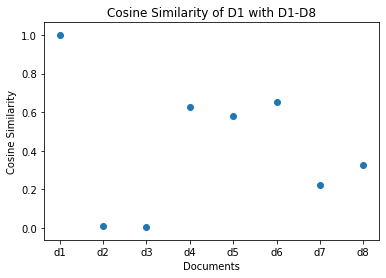

In [97]:
lists = sorted(cosine_dict.items())

x, y = zip(*lists)

plt.scatter(x, y)
plt.xlabel("Documents")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity of D1 with D1-D8")
plt.show()

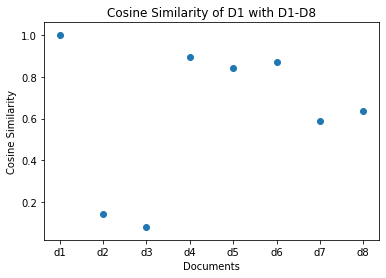

In [98]:
lists = sorted(cosine_sk_dict.items())

x, y = zip(*lists)

plt.scatter(x, y)
plt.xlabel("Documents")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity of D1 with D1-D8")
plt.show()

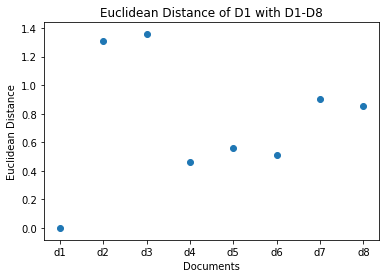

In [109]:
lists = sorted(euc_dist.items())

x, y = zip(*lists)

plt.scatter(x, y)
plt.xlabel("Documents")
plt.ylabel("Euclidean Distance")
plt.title("Euclidean Distance of D1 with D1-D8")
plt.show()